# Main Library

In [2]:
# Reading Images
import numpy as np
import os, cv2
import re, random
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array

# Building Model
import tensorflow.keras as k
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB7, EfficientNetV2M, ResNet50, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-10-18 10:39:24.478211: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 10:39:24.478330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 10:39:24.758609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading Images

In [5]:
columns = ['Apple__Healthy',
'Apple__Rotten',
'Banana__Healthy',
'Banana__Rotten',
'Bellpepper__Healthy',
'Bellpepper__Rotten',
'Carrot__Healthy',
'Carrot__Rotten',
'Cucumber__Healthy',
'Cucumber__Rotten',
'Grape__Healthy',
'Grape__Rotten',
'Guava__Healthy',
'Guava__Rotten',
'Jujube__Healthy',
'Jujube__Rotten',
'Mango__Healthy',
'Mango__Rotten',
'Orange__Healthy',
'Orange__Rotten',
'Pomegranate__Healthy',
'Pomegranate__Rotten',
'Potato__Healthy',
'Potato__Rotten',
'Strawberry__Healthy',
'Strawberry__Rotten',
'Tomato__Healthy',
'Tomato__Rotten']

class_labels = columns

In [6]:
path = r'/kaggle/input/fruit-and-vegetable-disease-healthy-vs-rotten/Fruit And Vegetable Diseases Dataset'
#columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten',
#           'Bellpepper__Healthy', 'Bellpepper__Rotten']

#class_labels = ['Apple Healthy', 'Apple Rotten', 'Banana Healthy', 'Banana Rotten',
#           'Bellpepper Healthy', 'Bellpepper Rotten']



images = []
labels = []

count = 0
for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir(path + '/' + folder):
        image = cv2.imread(path + '/' + folder + '/' + img)
        image = cv2.resize(image, (128, 128))
        images.append(image)
        labels.append(count)
    count += 1
    
print(len(images)), print(len(labels))

Loading -->  Apple__Healthy
Loading -->  Apple__Rotten


libpng warning: iCCP: known incorrect sRGB profile


Loading -->  Banana__Healthy
Loading -->  Banana__Rotten
Loading -->  Bellpepper__Healthy
Loading -->  Bellpepper__Rotten
Loading -->  Carrot__Healthy
Loading -->  Carrot__Rotten
Loading -->  Cucumber__Healthy


libpng warning: iCCP: known incorrect sRGB profile


Loading -->  Cucumber__Rotten
Loading -->  Grape__Healthy
Loading -->  Grape__Rotten
Loading -->  Guava__Healthy
Loading -->  Guava__Rotten
Loading -->  Jujube__Healthy
Loading -->  Jujube__Rotten
Loading -->  Mango__Healthy
Loading -->  Mango__Rotten
Loading -->  Orange__Healthy
Loading -->  Orange__Rotten
Loading -->  Pomegranate__Healthy
Loading -->  Pomegranate__Rotten
Loading -->  Potato__Healthy
Loading -->  Potato__Rotten
Loading -->  Strawberry__Healthy
Loading -->  Strawberry__Rotten
Loading -->  Tomato__Healthy


libpng warning: iCCP: known incorrect sRGB profile


Loading -->  Tomato__Rotten
29291
29291


(None, None)

In [7]:
data = np.array(images).astype('float32')
data = data / 255.0

labels = np.array(labels)

print(data.shape)

(29291, 128, 128, 3)


# Prepare Labels & Shuffle Data

In [8]:
data, labels = shuffle(data, labels)

labels = to_categorical(labels, len(columns))
labels[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# Show Random Images

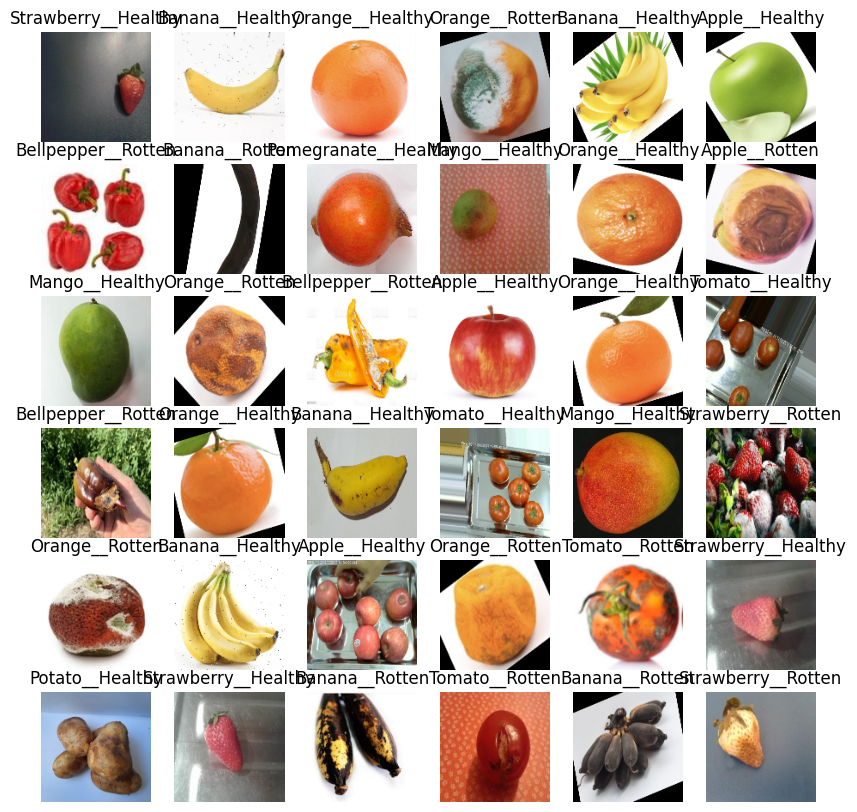

In [9]:
plt.figure(figsize=(10, 10))

for i,j in enumerate(list(np.random.randint(0, len(data), 36))):
    plt.subplot(6, 6, i+1)
    image = cv2.cvtColor(data[j], cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    plt.title(class_labels[labels[j].argmax()])

# Splitting Data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=42)

# Building Deep Learning Model From Scratch

In [13]:
model = Sequential()

model.add(Conv2D(filters=9, kernel_size=(5, 5), padding='same', input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(4, 4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))

model.add(Dense(28, activation="softmax"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 9)    │           684 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128, 128, 9)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 42, 42, 9)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 42, 42, 64)     │        14,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 28)             │         1,820 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,967,496 (7.51 MB)

 Trainable params: 1,967,496 (7.51 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss=k.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/10
  3/184 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.0720 - loss: 3.3014

I0000 00:00:1729248921.216525     118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1729248921.242432     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2119 - loss: 2.6379

W0000 00:00:1729248932.214028     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1729248935.514581     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


184/184 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.2125 - loss: 2.6356 - val_accuracy: 0.5341 - val_loss: 1.5144
Epoch 2/10
  3/184 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.4792 - loss: 1.6922 

W0000 00:00:1729248938.668861     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5613 - loss: 1.4489 - val_accuracy: 0.6878 - val_loss: 1.0529
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.6988 - loss: 1.0023 - val_accuracy: 0.7774 - val_loss: 0.7178
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.7661 - loss: 0.7439 - val_accuracy: 0.8071 - val_loss: 0.6006
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.8243 - loss: 0.5685 - val_accuracy: 0.8565 - val_loss: 0.4586
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.8483 - loss: 0.4886 - val_accuracy: 0.8711 - val_loss: 0.4121
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8790 - loss: 0.3754 - val_accuracy: 0.8626 - val_loss: 0.4469
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.9028 - loss: 0.3043 - val_accuracy: 0.8720 - val_loss: 0.4380
Epoch 9/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.9024 - loss: 0.3107 - val_accuracy: 0.891

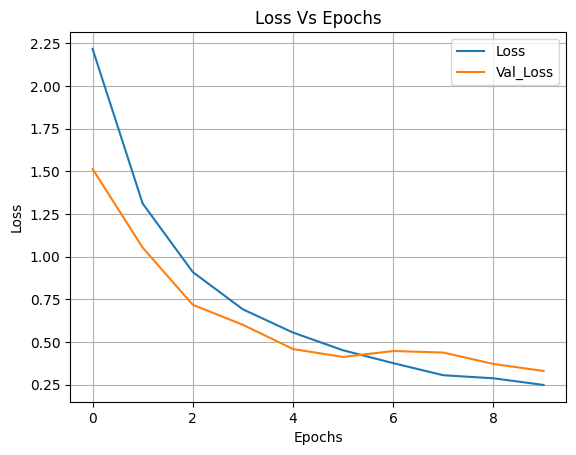

In [15]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

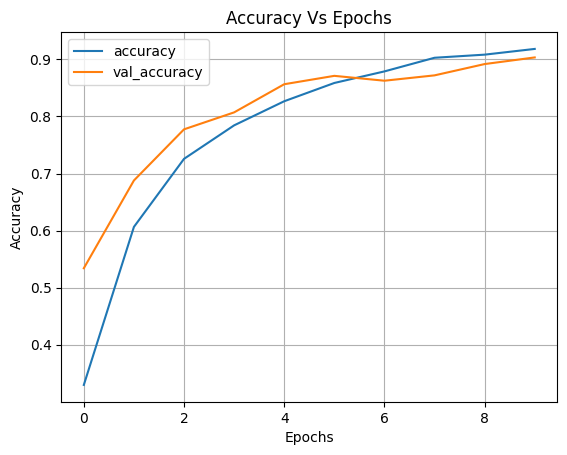

In [16]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [17]:
#Step7: Saving the model
import h5py
model.save('foodQuality_model.h5')

# Building Pre-Training Model

## EfficientNetV2M

In [ ]:
model_B7 = k.applications.efficientnet_v2.EfficientNetV2M(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

In [ ]:
model = k.models.Sequential()
model.add(model_B7)
model.add(k.layers.Flatten())
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(512, activation="relu"))
model.add(k.layers.Dropout(0.5))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(64, activation="relu"))
model.add(k.layers.Dense(6, activation="softmax"))


model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), 
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=128)

## Mobile Net

In [ ]:
model_mobilenet = MobileNet()
model_1 = k.models.Sequential()
for layer in model_mobilenet.layers[:-1]:
    model_1.add(layer)
for layers in model_1.layers:
    layers.trainable = False
    
    
model_1.add(Dense(6, activation="softmax"))
model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1.summary()

In [ ]:
model_1.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))